In [1]:
import geopandas
from geopandas import read_file

In [2]:
import mapclassify
mapclassify.__version__

'2.2.0'

In [3]:
import libpysal
libpysal.__version__

'4.2.0'

In [5]:
libpysal.examples.available()

                      Name                                        Description  Installed
0                    10740    Albuquerque, New Mexico, Census 2000 Tract Data       True
1                   AirBnB  Airbnb rentals, socioeconomics, and crime in C...      False
2                  Atlanta       Atlanta, GA region homicide counts and rates      False
3                Baltimore          Baltimore house sales prices and hedonics      False
4                Bostonhsg               Boston housing and neighborhood data      False
5              Buenosaires      Electoral Data for 1999 Argentinean Elections      False
6              Charleston1   2000 Census Tract Data for Charleston, SC MSA...      False
7              Charleston2   1998 and 2001 Zip Code Business Patterns (Cen...      False
8           Chicago Health                   Chicago Health + Socio-Economics      False
9              Chile Labor                 Labor Markets in Chile (1982-2002)      False
10         Chile Migr

In [6]:
_ = libpysal.examples.load_example('South')
pth = libpysal.examples.get_path('south.shp')

In [7]:
df = read_file(pth)

## New default legend formatting

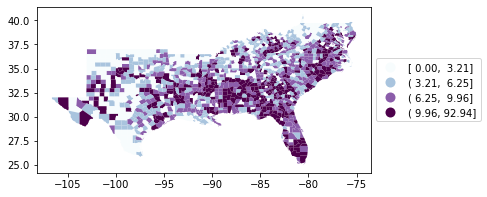

In [8]:
%matplotlib inline
ax = df.plot(column='HR60', scheme='QUANTILES', k=4, \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

In [9]:
labels = [t.get_text() for t in ax.get_legend().get_texts()]
labels

['[ 0.00,  3.21]', '( 3.21,  6.25]', '( 6.25,  9.96]', '( 9.96, 92.94]']

In [10]:
q4 = mapclassify.Quantiles(df.HR60, k=4)
q4

Quantiles             

   Interval      Count
----------------------
[ 0.00,  3.21] |   353
( 3.21,  6.25] |   353
( 6.25,  9.96] |   353
( 9.96, 92.94] |   353

In [11]:
labels == q4.get_legend_classes()

True

Note that in this case, the first interval is closed on the minimum value in the dataset. The other intervals have an open lower bound. This is now displayed in the legend.

## Overriding numerical format

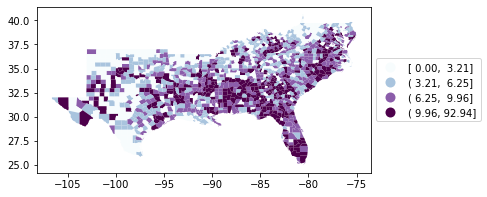

In [12]:
ax = df.plot(column='HR60', scheme='QUANTILES', k=4, \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)},
          )

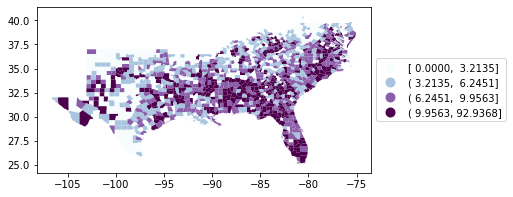

In [13]:
ax = df.plot(column='HR60', scheme='QUANTILES', k=4, \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),  'fmt':"{:.4f}"})

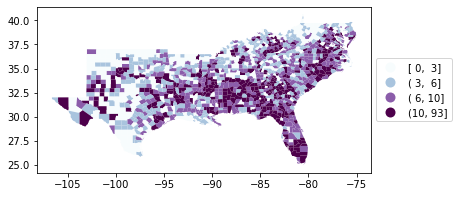

In [14]:
ax = df.plot(column='HR60', scheme='QUANTILES', k=4, \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),  'fmt':"{:.0f}"})

The new legends_kwds arg `fmt` takes a string to set the numerical formatting.

## When first class lower bound < y.min()

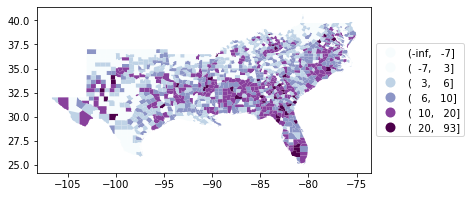

In [15]:
ax = df.plot(column='HR60', scheme='BoxPlot', \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
                         'fmt': "{:.0f}"})

In [16]:
bp = mapclassify.BoxPlot(df.HR60)
bp


BoxPlot               

   Interval      Count
----------------------
( -inf, -6.90] |     0
(-6.90,  3.21] |   353
( 3.21,  6.25] |   353
( 6.25,  9.96] |   353
( 9.96, 20.07] |   311
(20.07, 92.94] |    42

In [17]:
bp.get_legend_classes(fmt="{:.0f}")

['(-inf,   -7]',
 '(  -7,    3]',
 '(   3,    6]',
 '(   6,   10]',
 '(  10,   20]',
 '(  20,   93]']

In some classifiers the user should be aware that the lower (upper) bound of the first (last) interval is not equal to the minimum (maximum) of the attribute values. This is useful to detect extreme values and highly skewed distributions.

## Categorical Data

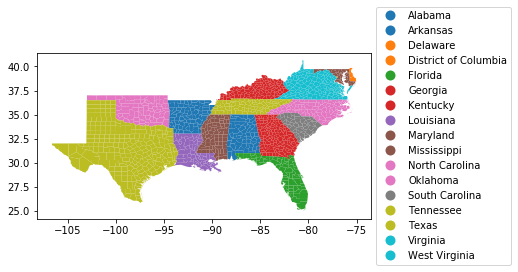

In [18]:
ax = df.plot(column='STATE_NAME', categorical=True, legend=True, \
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
                         'fmt': "{:.0f}"}) # fmt is ignored for categorical data